<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/IMDB_Classification_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 1000
maxlen = 20





Using TensorFlow backend.


In [0]:
#!pip install numpy==1.16.1

In [3]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 3s 0us/step


In [4]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [5]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 218
1 : 189
2 : 141
3 : 550
4 : 147
5 : 43
6 : 123
7 : 562
8 : 233
9 : 130
10 : 450


In [7]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 68
1 : 260
2 : 603
3 : 181
4 : 108
5 : 132
6 : 761
7 : 180
8 : 134
9 : 370
10 : 209


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [9]:
for i,seq in enumerate(x_train):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [10]:
for i,seq in enumerate(x_test):
  if i > 10:
    break
  else:
    print(i,':', len(seq))

0 : 20
1 : 20
2 : 20
3 : 20
4 : 20
5 : 20
6 : 20
7 : 20
8 : 20
9 : 20
10 : 20


In [11]:
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [12]:

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[0]])
  

1646592/1641221 [==============================] - 2s 1us/step


In [13]:
decoded_review

'story was so ? because it was true and was ? life after all that was ? with us all'

In [0]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in x_train[1]])

In [15]:
decoded_review

'on the ? that was the ? and have a good old laugh at how bad everything was back then'

# Model 1 : Using a simple embedding layer (with 8 dimensional vectors) and a Dense Layer 

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])


W0720 08:38:45.276958 140255298971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 08:38:45.311868 140255298971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 08:38:45.320942 140255298971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 08:38:45.358243 140255298971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0720 08:38:45.375517 140255298971520 deprecation_wrappe

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train,y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

W0720 08:38:45.599284 140255298971520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 259us/step - loss: 0.6772 - acc: 0.6006 - val_loss: 0.6448 - val_acc: 0.6704
Epoch 2/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.5830 - acc: 0.7188 - val_loss: 0.5629 - val_acc: 0.7046
Epoch 3/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.5152 - acc: 0.7464 - val_loss: 0.5362 - val_acc: 0.7208
Epoch 4/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.4879 - acc: 0.7607 - val_loss: 0.5299 - val_acc: 0.7292
Epoch 5/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.4731 - acc: 0.7694 - val_loss: 0.5290 - val_acc: 0.7334
Epoch 6/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.4633 - acc: 0.7773 - val_loss: 0.5317 - val_acc: 0.7344
Epoch 7/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.4548 - acc: 0.7819 - val_loss: 0.5333 - val_acc

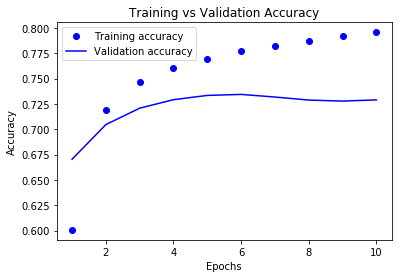

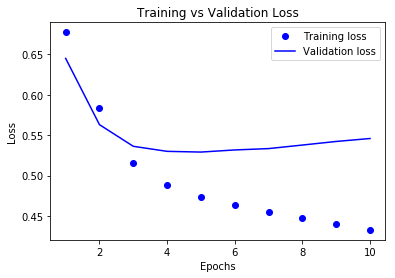

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# **Accuracy Achieved - 72%**
## **(with Embedding and one Dense layer )**

We have achived 72% with just one embedding and dense layer which is not bad, however we should make use of RNN here so as to understand the embedding more thoroughly

Now lets use the raw IMDB dataset and then we will be using Word2Vec or Glove

#Model 2 : Using Word embedding layer from Glove word vectorization, and two Dense layers

In [0]:
import os, shutil
from google.colab import drive
from tqdm import tqdm
import pickle

In [21]:
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [22]:
os.getcwd()

'/gdrive'

In [0]:
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb')

In [0]:
base_dir = '/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb'

Preprocessing the input data. The review data is such that each review is kept in a txt file. Hence there are 25000 txt files with 25k reviews. There are two folders namely neg and pos, for negative and positive sentiments respectively. What we are doing below is going to individual folder, getting the file text, appending the same in the texts list , putting the corresponding sentiment classification (1 if coming from neg folder and pos if coming from pos folder) and getting the input data ready to be consumed.

In [25]:
'''
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

texts = []
labels = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  print(dir_name)
  for file in tqdm(os.listdir(dir_name)):
    if file.endswith('.txt'):
      file_path = os.path.join(dir_name,file)
      with open(file_path) as f_name:
        texts.append(f_name.read())
        if label_type == 'neg':
          labels.append(0)
        else:
          labels.append(1)
'''

"\ntrain_dir = os.path.join(base_dir,'train')\ntest_dir = os.path.join(base_dir,'test')\n\ntexts = []\nlabels = []\n\nfor label_type in ['neg','pos']:\n  dir_name = os.path.join(train_dir,label_type)\n  print(dir_name)\n  for file in tqdm(os.listdir(dir_name)):\n    if file.endswith('.txt'):\n      file_path = os.path.join(dir_name,file)\n      with open(file_path) as f_name:\n        texts.append(f_name.read())\n        if label_type == 'neg':\n          labels.append(0)\n        else:\n          labels.append(1)\n"

Since the above process takes time, I have pickled the texts and labels files onto drive, which could be reused everytime i want to rerun the code

In [26]:
'''
import pickle
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')
filename1 = open('texts_serialized.pkl','wb')
pickle.dump(texts,filename1)
filename1.close()
filename2 = open('labels_serialized.pkl','wb')
pickle.dump(labels,filename2)
filename2.close()
'''


"\nimport pickle\nos.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')\nfilename1 = open('texts_serialized.pkl','wb')\npickle.dump(texts,filename1)\nfilename1.close()\nfilename2 = open('labels_serialized.pkl','wb')\npickle.dump(labels,filename2)\nfilename2.close()\n"

Below code is used to reload the serialized file

In [0]:
texts = []
labels = []
import pickle
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')
filename1 = open('texts_serialized.pkl','rb')
texts = pickle.load(filename1)
filename1.close()
filename2 = open('labels_serialized.pkl','rb')
labels = pickle.load(filename2)
filename2.close()


In [28]:
len(labels), len(texts)

(25000, 25000)

In [29]:
texts[0]

'Good Deaths. Good Mask. Cool Axe. Good Looking Girls....But Watch Out!!! No Plot and Little Scares Completely lower it\'s Standards. They Tried to make an "I Know what you Did Last Summer", but ended up making A "Scream". But Hey, What do people Expect From a Horror Movie? Answers Totally Vary. Rent It If You Want, but I Regret Ever Seeing It.'

In [30]:
labels[24990:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

What we are going to do here is. We will be using the exising word embedding Glove, which is nothing but a 100 dimensional vector representation for each word. We will restrict our training Samples to 200, since the external word embedding is usually useful when you have less training data, else pipeline (using our own embedding) embedding is better. We will take 200 training records and 10000 validation records. We will take the max 10000 most frequent words from the dictionary. Below is what we are going to do
We have 

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlength = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words = max_words )


In [32]:
tokenizer.word_index

{}

When we fit_on_text, the tokenizer takes all the words in the texts, gives each word a index and create a dictionary as { WORD : INDEX }

In [0]:
tokenizer.fit_on_texts(texts)

Lets look at how many words did it tokenized all together and created a dictionary

In [34]:
len(tokenizer.word_index)

88582

Lets looka at a few of them

In [35]:
for i,j in tokenizer.word_index.items():
  if j > 10:
    break
  else:
    print(i,j)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


what text_to_sequence will do is, It will tokenize the sentense into words, and give each word an index, referencing the word_index.

In [0]:
sequences = tokenizer.texts_to_sequences(texts)

Lets verify that, Lets see if we have the same number of reviews/records, same number of words in the sentense and same number of index sequence.

In [37]:
len(texts),len(texts[0].split()),len(sequences[0]),len(sequences)

(25000, 62, 62, 25000)

Now we will pad the sequences max up to the 100 words

In [38]:
word_index = tokenizer.word_index
print('found {} unique token'.format(len(word_index)))
data = pad_sequences(sequences,maxlen = maxlength)

found 88582 unique token


Lets verify that, we should have data with maximum length as 100

In [39]:
print(len(sequences))
print(len(sequences[0] ))
print(len(data[0] ))
print(type(data))

25000
62
100
<class 'numpy.ndarray'>


In [40]:
import numpy as np
labels = np.asarray(labels)
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (25000, 100)
Label shape: (25000,)


Now we will shuffle the indices and then pick the train and validation data 

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

In [42]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((200, 100), (200,), (10000, 100), (10000,))

Now we will be using the Glove word vectorization to do word embedding. We are using glove.6B.100d.txt text file which is a list of list with below format
{ word : 100 dimensional vector represtation }

In [43]:
glove_dir = '/gdrive/My Drive/colab_datasets/base_dir_imdb/Word_vectorization'
embedding_index = {}
glove_file = os.path.join(glove_dir,'glove.6B.100d.txt')
with open(glove_file) as gfile:
  for line in gfile:
    values = line.split()
    word = values[0]
    coefs= np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
print('found {} words in index'.format(len(embedding_index)) )
    

found 400000 words in index


Lets look at one example, lets check the word vectorization of 'the'

In [44]:
embedding_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [45]:
os.getcwd()
#os.chdir('/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models')

'/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models'

I am serializing the embedding Index for later use

In [0]:
import pickle
embedding_file = open('embedding_index.pkl','wb')
pickle.dump(embedding_index,embedding_file)
embedding_file.close()

In [47]:
for i,(word,coef) in enumerate(embedding_index.items()):
  if i< 1:
    print(word,coef, len(coef))

the [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.270

In [0]:
embedding_dim = 100

In [49]:
for i,(word,index) in enumerate(word_index.items()):
  if i < 10:
    print(word,index)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


In [50]:
max_words, embedding_dim

(10000, 100)

Now we will be creating Embedding Matrix which should be of the size (10000,100), This will be a sparse matrix. The words which are not there will be empty array of 0s. Below is what we have to achieve

We have 
word_index ={ word : index }
embedding index = word : vector
We want 
Embedding_matrix = Index : 100 dimensional Vectors
we will take each entry from word_index, check if it is less than equal to 10000, if it is then insert the record in dictionary with index and vector(get it from embedding_index) Finally we will get an arrary with 10000 elements each having lenght 100 and th index of the element will give the index of the word


In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word,index in word_index.items():
  if index<max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
  

In [52]:
embedding_matrix.shape

(10000, 100)

In [53]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlength))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.layers

Loading pretraing word embedding to the embedding layer, Please note, we will make the embedding layer non trainable because we dont want the vectors to be changed.

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

We need to freeze the layer0 as well as we dont want the weights to be updated again.

In [0]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy', metrics = ['acc'])

In [57]:
history = model.fit(x_train,y_train,epochs=10,batch_size = 32, validation_data = (x_val,y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.8407 - acc: 0.5300 - val_loss: 0.7037 - val_acc: 0.5180
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5564 - acc: 0.7200 - val_loss: 0.6882 - val_acc: 0.5575
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5174 - acc: 0.7500 - val_loss: 0.6936 - val_acc: 0.5565
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2751 - acc: 0.9350 - val_loss: 1.1135 - val_acc: 0.5095
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2889 - acc: 0.8850 - val_loss: 0.8033 - val_acc: 0.5377
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1713 - acc: 0.9700 - val_loss: 0.8467 - val_acc: 0.5331
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3167 - acc: 0.8650 - val_loss: 0.9265 - val_acc: 0.5197
Epoch 8/10
200/200 [========

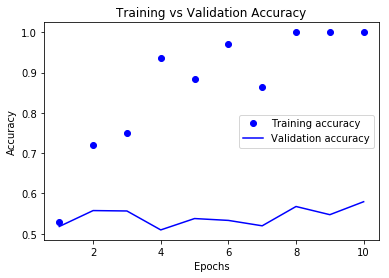

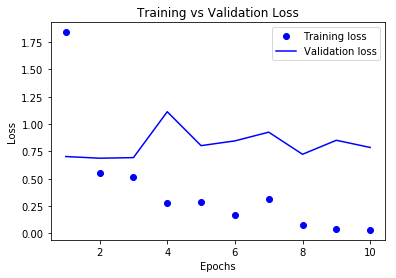

In [58]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# Accuracy Achieved - 57%.

# Analyzing what we have done so far
## Model1 (Using Keras Word embedding and 1 Dense Layer)
We used the inbuild imdb data set from Keras, used the indexed data already present and used a Embedding layer on top of it directly. The Embedding layer will train the model and create a 8 dimensional vector for each word. We will finally get a vector space of (10000,20,8) shape
### We achived 72 percent accuracy since we are using the keras word embedding which is more context specific. 
## Model2 (Using GloVe Embedding and 2 Dense Layers)
Next we used external word embedding from Glove and used the vectorized representation (100 dimensional) but for only 10000 most frequent words and only first 100 words in each review. We used word_index from tokenizer and embedding_index from GloVe and created Embedding_matrix. Used that in Embedding layer to set weights and made it Non trainable. We used two dense layers this time. 
### We achived 57% accuracy, naturally so, since we used GloVe embedding to do the word vectorization. This was a downfall.
## Model3 - Next Step is RNN - Recurrent Neural Networks
Next we should explore the RNN layers.The big difference is, So far we have been converting the whole dataset in one big arrary of input and passing it in one-go to the Model. We have not done any sequential processing so far. 
With RNN, we will be doing Sequential processing. That mean, we will be passing one input at a time, We will keep track of the previous state (i.e.Output from previous state) and Multiply all of these with their own set of weigths, add bias and then arrive at output for that state. Next we set this output as the state for next timestep and do the same process again. 

## Whats the difference ? 

In the word embedding(Keras and GloVe) technique we had not given any importance to the sequence of the data.These are called Feedforward networks. We just looked at the presense of words in the reviews and predicted the sentiment if those similar words are present in the validation reviews.
In RNN, We will be taking into account the sequence of those words in the review statement. For sequential models, RNN works better than Feedforward networks. Like, if there are two reviews
### "The movie was good" - Training Dataset
### "Was the movie good ?" - Validation Dataset
For the word embedding models there is no difference in these two statements as it will check the presence of same 4 words in two sequences. So if the first review is from training and the second from Validation, if all likelihood the embedding model will predict the validation example as "pos". 
However in RNN, it will give sequence of words importance, will check other examples where we found the same sequence and predict the category as per that. Looks like in the second review the user had serious doubts of movie being good, so he has a negative mindset about the movie, Hence that may get classified as "neg".

In [59]:
os.getcwd()

'/gdrive/My Drive/colab_datasets/base_dir_imdb/aclImdb/saved_models'

In [0]:
model.save_weights('pre_trained_glove_model.h5')

Below is a simple implementation of the 

In [61]:
import numpy as np
timesteps = 100 
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
print('inputs.shape :',inputs.shape)
state_t = np.zeros((output_features,))
print('state_t.shape',state_t.shape)
W = np.random.random((output_features, input_features))
print('W.shape ',W.shape )
U = np.random.random((output_features, output_features))
print('U.shape',U.shape)
b = np.random.random((output_features,))
print('W.shape,inputs[0].shape',W.shape,inputs[0].shape)
print('U.shape, state_t.shape',U.shape, state_t.shape)
successive_outputs = []
for input in inputs:
  output_t = np.tanh(np.dot(W,input) + np.dot(U,state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.concatenate(successive_outputs,axis=0)
print('final_output_sequence.shape,len(successive_outputs)',final_output_sequence.shape,len(successive_outputs))

inputs.shape : (100, 32)
state_t.shape (64,)
W.shape  (64, 32)
U.shape (64, 64)
W.shape,inputs[0].shape (64, 32) (32,)
U.shape, state_t.shape (64, 64) (64,)
final_output_sequence.shape,len(successive_outputs) (6400,) 100


# Model 3 : Using Embedding and Recurrent Layer and a Dense Layer

## Preparing the IMDB Data

In [67]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
bat_size = 32

(input_train,y_train), (input_test,y_test) = imdb.load_data(num_words = max_features)

print('input_train shape',input_train.shape)
print('input_test shape',input_test.shape)

input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test  = sequence.pad_sequences(input_test,maxlen=maxlen)

print('input_train shape',input_train.shape)
print('input_test shape',input_test.shape)

input_train shape (25000,)
input_test shape (25000,)
input_train shape (25000, 500)
input_test shape (25000, 500)


In [72]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['acc'])

history = model.fit(input_train,y_train,epochs = 10,batch_size=128,validation_split = 0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6397 - acc: 0.6178 - val_loss: 0.5564 - val_acc: 0.7306
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4012 - acc: 0.8311 - val_loss: 0.4313 - val_acc: 0.8034
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2993 - acc: 0.8810 - val_loss: 0.3644 - val_acc: 0.8466
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2190 - acc: 0.9159 - val_loss: 0.3865 - val_acc: 0.8528
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1587 - acc: 0.9415 - val_loss: 0.3950 - val_acc: 0.8502
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1085 - acc: 0.9632 - val_loss: 0.4166 - val_acc: 0.8530
Epoch 7/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.0648 - acc: 0.9796 - val_loss: 0.4632 - val_acc:

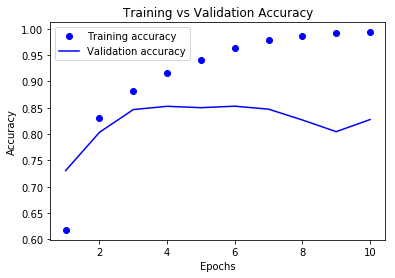

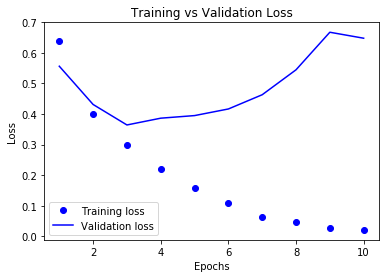

In [73]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(acc)+1))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# Accuracy Achived is 85% 

## What we achived and Whats next
We used the SimpleRNN model and achived 85% accuracy. To achive a higher validation accuracy, we will now use a more advanced models like LSTM.
The disadvantage with SimpleRNN is that, it doesn't factor in previous multiple timesteps. This is due to the effect known as Vanishing gradients. As the feedforward networks become deeper and deeper, we the problem of vanishing gradient, where the gradient becomes so small that the model becomes practically untrainable.
So as a solution we will be using LSTM, Long Short Term memory. It enables you to carry the information across multiple timesteps and hence you can better understand the Sequential data. If has Memory and Forget gate and slectively forgets some information and remembers other.

# Model 4 : Using a embedding layer, LSTM layer and a Dense Layer

In [0]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['acc'])

model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split= 0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.5400 - acc: 0.7462 - val_loss: 0.3675 - val_acc: 0.8532
Epoch 2/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.3045 - acc: 0.8827 - val_loss: 0.3313 - val_acc: 0.8756
Epoch 3/10
12032/20000 [=================>............] - ETA: 38s - loss: 0.2463 - acc: 0.9095